# 4. Logistic Regression

## 공부시간에 따른 자격증 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('LogisticRegression.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

## 학습 (로지스틱 회귀 모델)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## 6시간 공부했을때 예측?

In [18]:
classifier.predict([[6]])
# 결과 1 : 합격할거라고 예측

array([1])

In [21]:
classifier.predict_proba([[6]]) #합격할 확률 출력
#불합격 확률 출력 14 % 합격 확률 출력 86 %

array([[0.14150735, 0.85849265]])

In [19]:
classifier.predict([[4]])
# 결과 0 : 불합격할거라고 예측

array([0])

In [23]:
classifier.predict_proba([[4]])
#불합격 확률 출력 62.5 % 합격 확률 출력 37.5 %

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트)

In [25]:
y_pred = classifier.predict(X_test)
y_pred #예측값

array([1, 0, 1, 1])

In [26]:
y_test #실제값 (테스트세트)

array([1, 0, 1, 0])

In [28]:
X_test # 공부시간 (테스트세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [31]:
classifier.score(X_test, y_test) #모델평가
# 전체 4개의 테스트 중에서 분류 예측을 올바로 맞힌 개수 3개 (3/4)

0.75

## 데이터시각화 (훈련 세트)

In [33]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지를 0.1로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [37]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [38]:
p.shape

(1, 95)

In [39]:
X_range.shape

(95,)

In [40]:
p = p.reshape(-1)
p.shape

(95,)

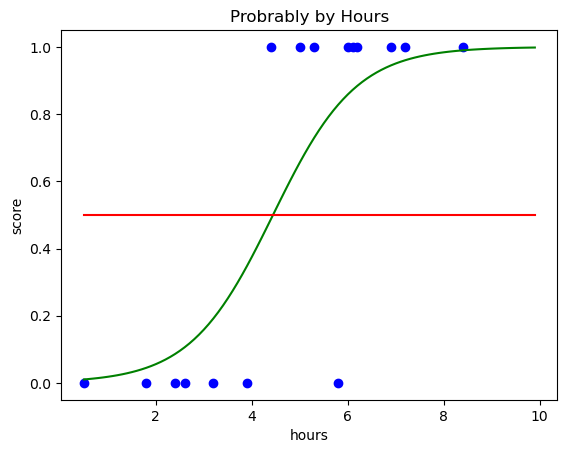

In [45]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red')
plt.title('Probrably by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [47]:
classifier.predict_proba([[4.5]]) #4.5시간 공부했을 때 합격 확률 51%, 불합격 확률 49%

array([[0.48310686, 0.51689314]])

### 혼돈 행렬 (Confusion Matrix)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#TRUE Nagative(TN)     FALSE Positive(FP)
#불합격일거야(예측)        #합격일거야(예측)
#불합격 (실제)           #불합격(실제)

#FALSE Nagative(FN)    TRUE Positive(TP)
#불합격일거야(예측)        합격일거야(예측)
#합격 (실제)             합격(실제)

array([[1, 1],
       [0, 2]])